# Classification: Naive Bayes

## Bayesian classification

* finding $P(L~|~{\rm features})$, the **probability of a label given some observed features**

* relies on **Bayes Theorem**

## Notation

* P(A) means “the probability that A is true.” (prior)

* P(A|B) means “the probability that A is true given that B is true.” (posterior)

## Conditional Probability

e.g. Coin Toss

* fair coin => equal chance of getting either heads or tails
* probability of getting heads = 50%

e.g. Fair Dice

* probability of getting a 1 when you roll a (fair) dice with 6 faces = 1/6 = 0.166

e.g. playing cards

* probability of picking a queen given the card is a spade?
    * condition = card is a spade
    * denominator (eligible population) is 13 and not 52
    * numerator = 1, (only one queen in the spades suit)

* probability it is a queen given the card is a spade = 1/13 = 0.077

conditional probability of A given B = probability of A occurring given that B has already occurred

* P(A|B) = P(A AND B) / P(B)

### e.g. school with a total population of 100 persons

In [1]:
import pandas as pd 
data = [[8, 12], 
        [32, 48]]
df = pd.DataFrame(data)
df.rename(columns={0:'Female', 1:'Male'}, 
          index={0:'Teacher',1:'Student'}, 
          inplace=True)
df_Total = df.append(df.sum().rename('Total')).assign(Total=lambda d: d.sum(1))
df_Total

,Female,Male,Total
Teacher,8,12,20
Student,32,48,80
Total,40,60,100


What is the conditional probability that a certain member of the school is a ‘Teacher’ given that he is a ‘Man’?

In [2]:
# P(A|B) = P(A AND B) / P(B)
# P(Teacher | Male) = P(Teacher AND Male) / P(Male)

df['Male']['Teacher'] / df['Male'].sum()

0.2

* P(A|B) = P(A AND B) / P(B) => P(A and B) = P(A|B)P(B)

### relationship between joint and conditional probabilities

* P(A and B) = P(A|B)P(B)
* P(B and A) = P(B|A)P(A)

$\therefore$ equate RHS:  P(A|B)P(B) = P(B|A)P(A)

## Bayes Theorem

describes the relationship of conditional probabilities of statistical quantities

converts human belief, based on evidence, into predictions

conceived by the Reverend Thomas Bayes, an 18th-century British statistician who sought to explain how humans make predictions based on their changing beliefs

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

* A = event we want the probability of
    * "probability that a given person has cancer"
        * calculate: percent of the population has cancer
* B = new evidence that is related to A in some way
    * "person is a smoker"
        * update probability:
            * **P(A|B) = "posterior"**
                * we are trying to estimate
                    * “probability of having cancer given that the person is a smoker”.

* **P(B|A) = "likelihood"**
    * probability of observing the new evidence (training data), given our initial hypothesis
        * “probability of being a smoker given that the person has cancer”

* **P(A) = "prior"**
    * probability of our hypothesis without any additional prior information
        * “probability of having cancer”

* **P(B) = "marginal likelihood"**
    * total probability of observing the evidence
        * “probability of being a smoker” (serves as normalisation)

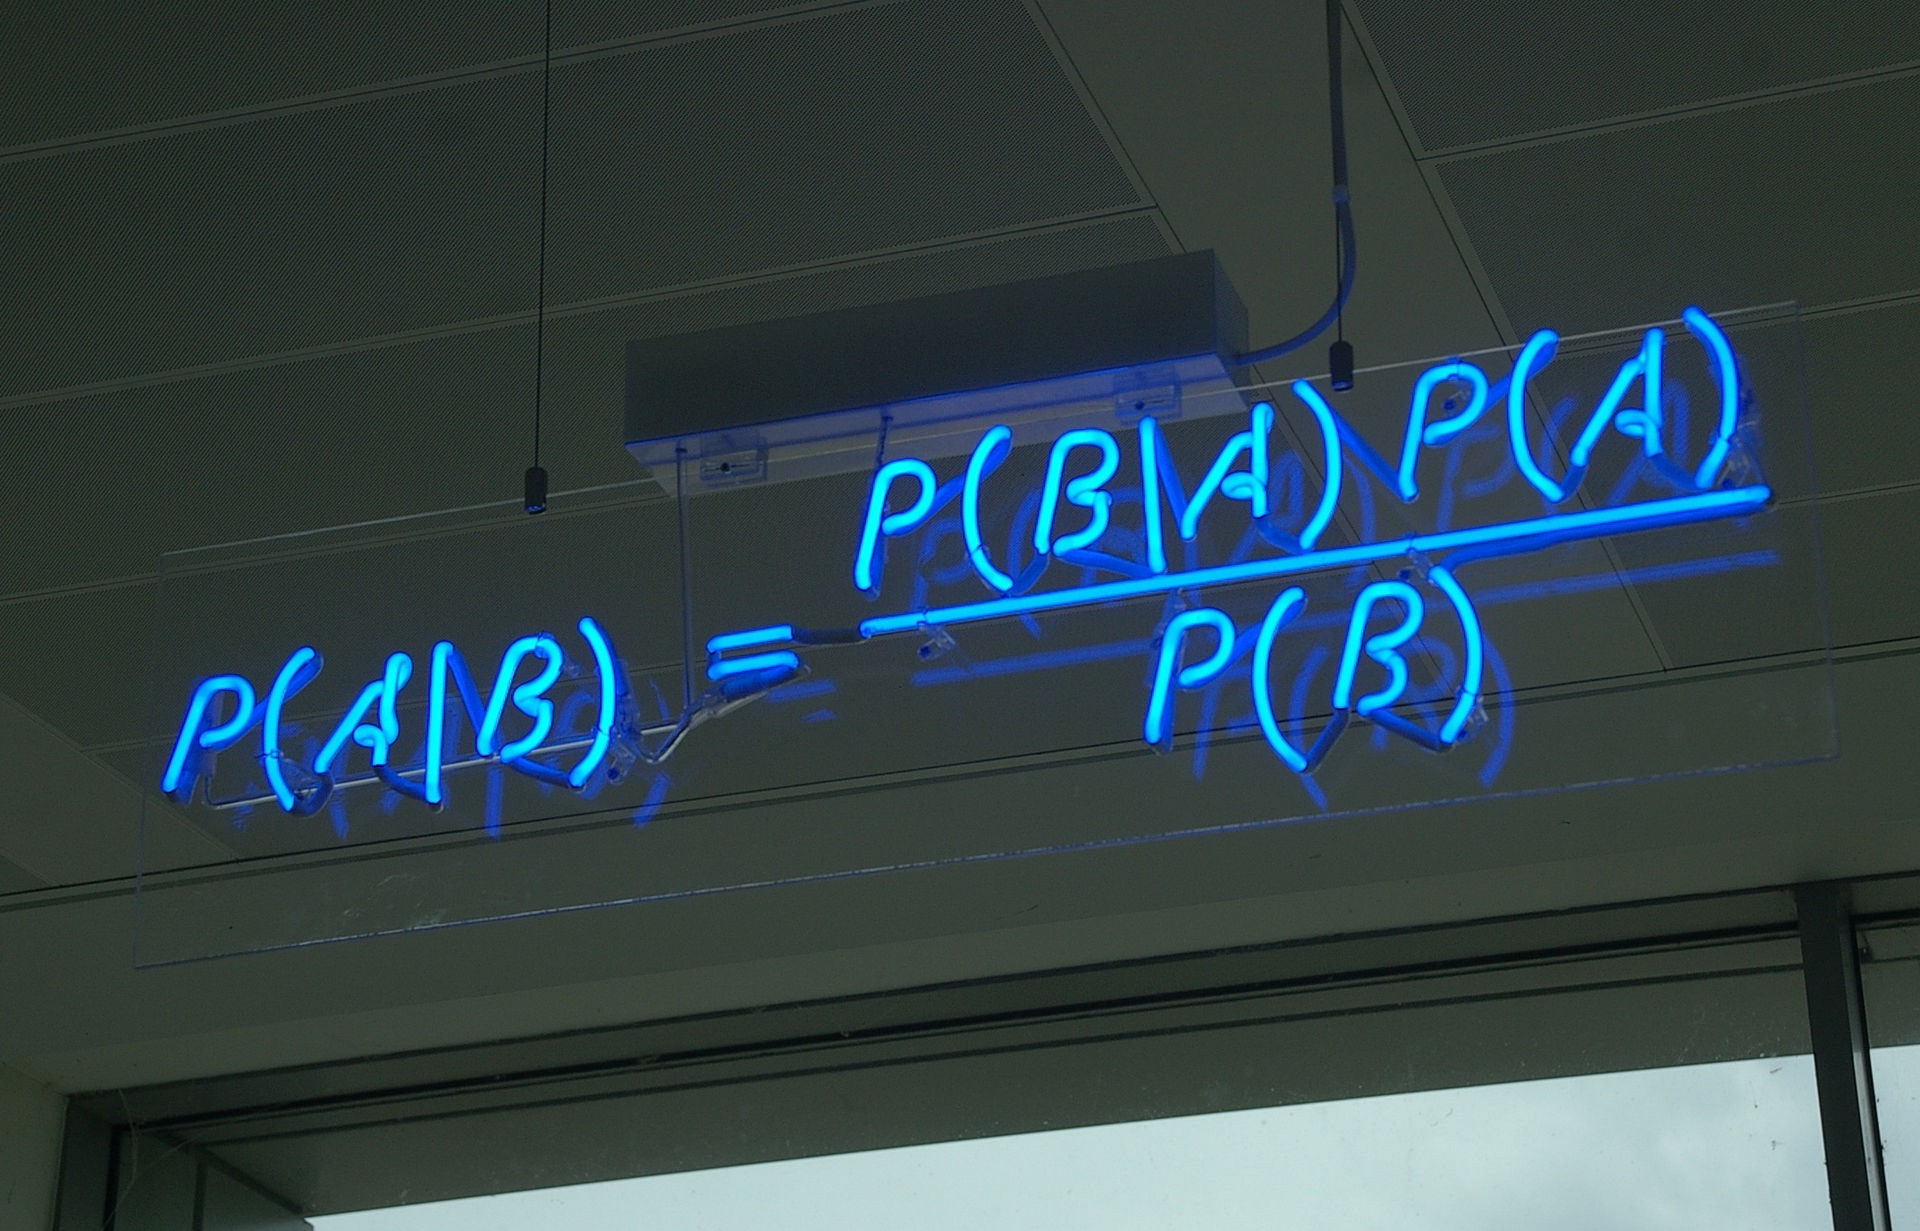

In [3]:
from IPython.display import Image
Image(filename='bayesTheorem.jpeg')
# https://www.flickr.com/photos/mattbuck007/3676624894
# (CC BY-SA)

#### Differing notational forms of the Bayes Theorem:

* for events A and B, provided that P(B) ≠ 0,
    
    $$P(A|B) = \frac{P(B|A)}{P(B)}{P(A)}$$


* given a hypothesis H and evidence E,

    $$P(H|E) = \frac{P(E|H)}{P(E)}{P(H)}$$


* given class c, data attributes x,

    $$P(c|x) = \frac{P(x|c)P(c)}{P(x)}$$


* given labels L of features,
    
    $$P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}$$

* from known training data to unknown test data

known: $P(X|Y) = \frac{P( X \& Y )}{P(Y)}$, -->  unknown:  $P(Y|X) = \frac{P( X \& Y )}{P(X)}$
    
$$P(Y|X) = \frac{P(X|Y)}{P(X)}{P(Y)}$$

## understand Bayes Theorem via Examples

### e.g. 1: "where there's smoke there's fire"

If dangerous fires are rare (1% 'prior') but smoke is fairly common (10%) due to barbecues, and 90% of dangerous fires make smoke then

$\begin{aligned}
    P(Fire|Smoke) &= \frac{P(Smoke|Fire)}{P(Smoke)}{P(Fire)}
\end{aligned}$

$\begin{aligned}
P(Fire|Smoke) &= \frac{90\%}{10\%}{1\%} \\
&= 9\%
\end{aligned}$

$\therefore$ "Probability of dangerous Fire when there is Smoke" = 9% 'posterior'

### e.g. 2: Players will play if weather is sunny.

In [4]:
import pandas as pd 
data = [['Sunny', 'No'], 
        ['Overcast', 'Yes'], 
        ['Rainy', 'Yes'], 
        ['Sunny', 'Yes'], 
        ['Sunny', 'Yes'], 
        ['Overcast', 'Yes'], 
        ['Rainy', 'No'], 
        ['Rainy', 'No'], 
        ['Sunny', 'Yes'], 
        ['Rainy', 'Yes'], 
        ['Sunny', 'No'], 
        ['Overcast', 'Yes'], 
        ['Overcast', 'Yes'],
        ['Rainy', 'No']]
df = pd.DataFrame(data, columns = ['Weather', 'Play'])

# Likelihood table
pd.crosstab(df.Weather,df.Play, margins=True, margins_name = "")/len(df.index)

Play,No,Yes,
Weather,,,
Overcast,0.000000,0.285714,0.285714
Rainy,0.214286,0.142857,0.357143
Sunny,0.142857,0.214286,0.357143
,0.357143,0.642857,1.000000


$\begin{aligned}
    P(Yes|Sunny) &= \frac{P(Sunny|Yes)}{P(Sunny)}{P(Yes)}
\end{aligned}$

$\begin{aligned}
P(Yes|Sunny) &= \frac{3/9}{5/14}{9/14} \\
&= \frac{0.33}{0.36}{0.64} \\
&= 0.60
\end{aligned}$

$\therefore$ Players will play if weather is sunny

### e.g. 3: e-mail that contains the word "sale" (event) is spam (hypothesis)

$P(class=SPAM|contains="sale") = \frac{P(contains="sale"|class=SPAM)}{P(contains="sale")}{P(class=SPAM)}$


* P(class=SPAM|contains="sale") is the probability of an e-mail being SPAM given that this e-mail contains the word "sale" [want to predict this]


* P(contains="sale"|class=SPAM) is the probability of an e-mail containing the word "sale" given that this e-mail has been recognized as SPAM [training data]


* P(class=SPAM) is the probability of an e-mail being SPAM (without any prior knowledge of the words it contains)
    * multiply by this value because we are interested in knowing how significant is information concerning SPAM e-mails
        * If this value is low, the significance of any events related to SPAM e-mails will also be low.


* P(contains="sale") is the probability of an e-mail containing the word "sale"
    * divide by this value because the more exclusive the word "sale" is, the more important is the context in which it appears. 
        * if this number is low (the word appears very rarely), it can be a great indicator that in the cases it does appear, it is a relevant feature to analyze.


### Imagine there exist TWO labels: $L_1$ and $L_2$

How to decide between them?

Consider the ratio:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{\frac{P({\rm features}~|~L_1)P(L_1)}{P({\rm features})}}{\frac{P({\rm features}~|~L_2)P(L_2)}{P({\rm features})}} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

How to compute $P({\rm features}~|~L_i)$ for each label?

Try: generative model, (which specifies the hypothetical random process that generates the data)